<a href="https://colab.research.google.com/github/monu322/CE888/blob/main/Lab10/HeartDisease_Pickle_saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Required packages 
#-------------------------

import pandas as pd

# Import the Logistic Regression Module from Scikit Learn
from sklearn.linear_model import LogisticRegression  

# Load the Module to split the Dataset into Train & Test 
from sklearn.model_selection import train_test_split

In [3]:
!python --version

Python 3.7.10


In [4]:
df = pd.read_csv('heart.csv')


df.loc[:200]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


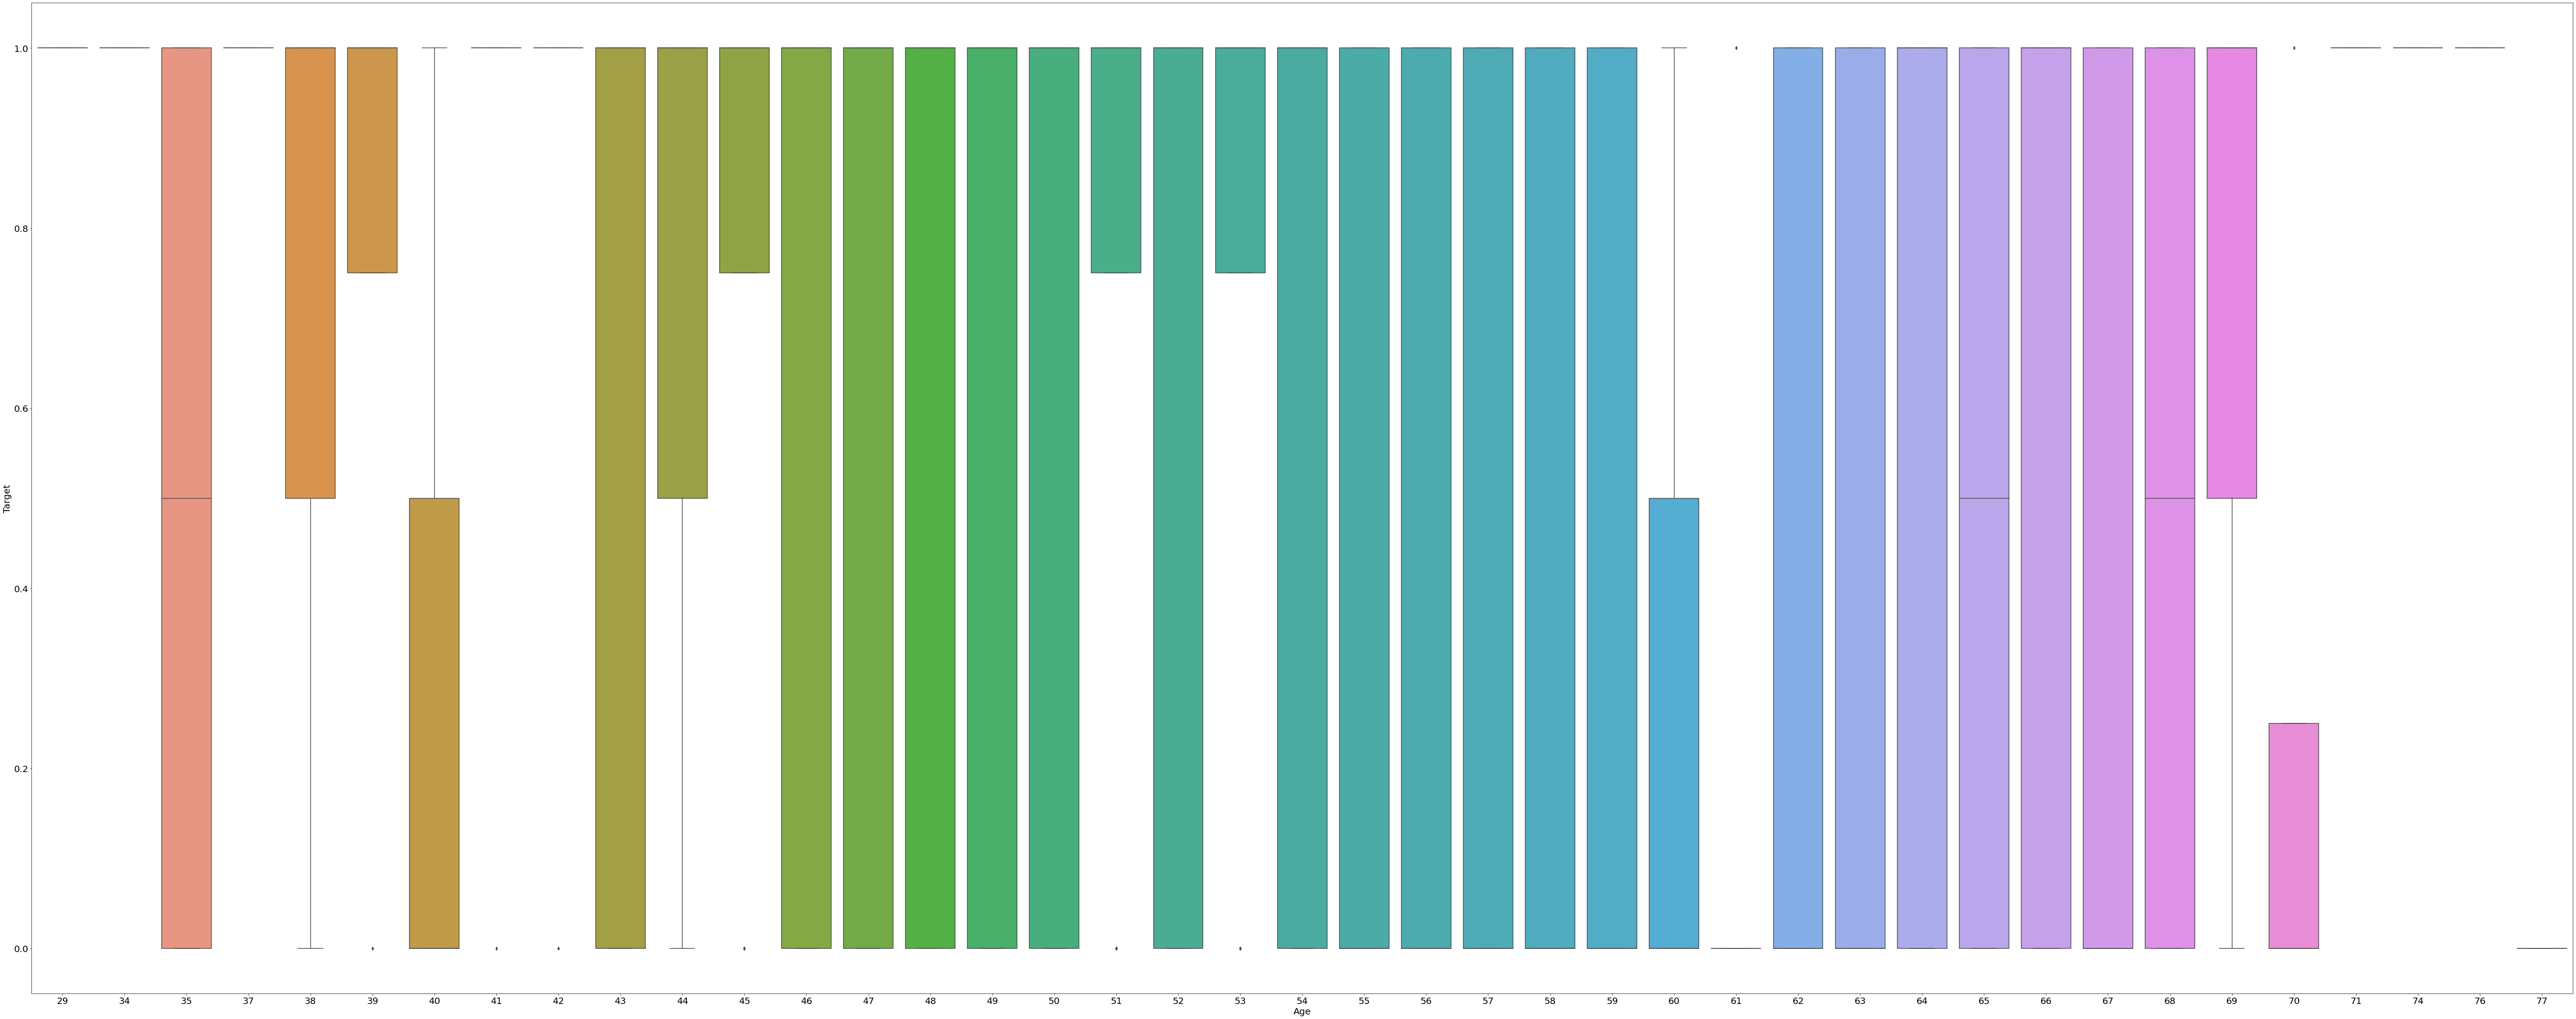

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100,40))
plt.rcParams.update({'font.size': 20})
sns.boxplot(x = 'age', y = 'target', data = df)
plt.ylabel('Target')
plt.xlabel('Age');

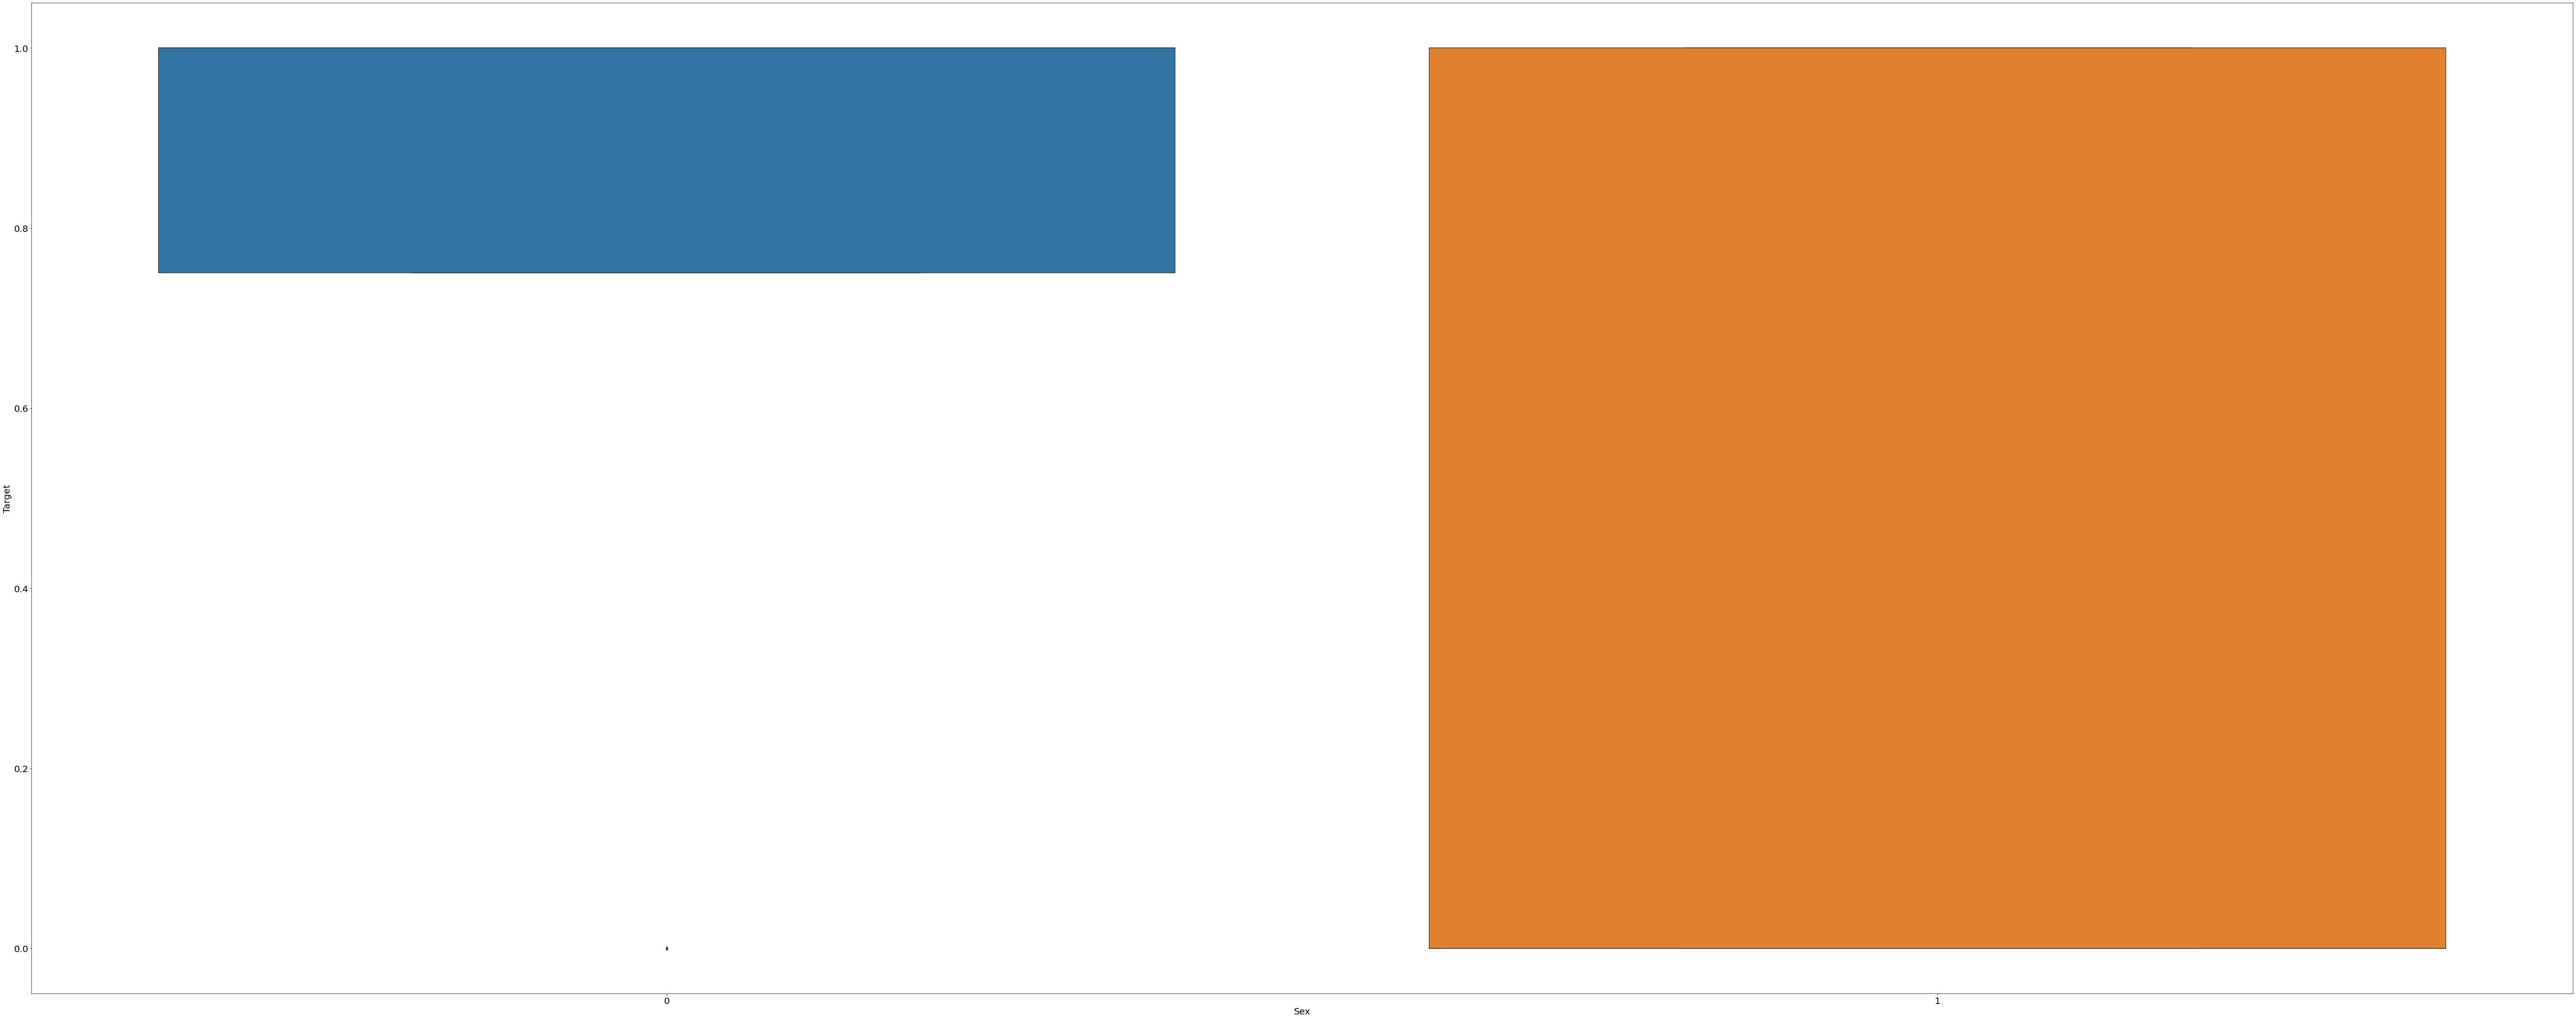

In [6]:
plt.figure(figsize=(100,40))
plt.rcParams.update({'font.size': 20})
sns.boxplot(x = 'sex', y = 'target', data = df)
plt.ylabel('Target')
plt.xlabel('Sex');

In [9]:
x = df.drop('target',axis=1)
y = df.target

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state = 42 , stratify = y) 

In [10]:
# Define the Model
LR_Model = LogisticRegression(C=0.1,  
                               max_iter=20, 
                               fit_intercept=True, 
                               n_jobs=3, 
                               solver='liblinear')

# Train the Model
LR_Model.fit(x_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import classification_report

def score(model):
    print('Train result : ')
    print('=='*20)
    print('score for data train : ', log_model.score(x_train , y_train)*100 ,'%')
    print('=='*20)
    y_pred = model.predict(x_train)
    report = classification_report(y_train,y_pred)
    print(report)
    print('=='*20)
    
    print('Test result : ')
    print('=='*20)
    print('score for data test ', log_model.score(x_test , y_test)*100,'%')
    print('=='*20)
    y_pred = model.predict(x_test)
    report = classification_report(y_test,y_pred)
    print(report)

In [12]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_train, y_train)

score(log_model)

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       110
           1       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [13]:
from sklearn.svm import SVC

svc_model = SVC(C=12)
svc_model.fit(x_train , y_train)

score(svc_model)

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       110
           1       0.71      0.81      0.76       132

    accuracy                           0.71       242
   macro avg       0.72      0.71      0.71       242
weighted avg       0.72      0.71      0.71       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.65      0.79      0.71        33

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



In [14]:
# Import pickle Package

import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(log_model, file)

# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

print(x_test.columns)

# Calculate the Score 
score = Pickled_LR_Model.score(x_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(x_test)  

Ypredict

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Test score: 80.33 %


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])